In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combining data into a single dataset
combined_df= pd.merge(mouse_metadata, study_results, how="left")

#Data preview
combined_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
#Checking the number of mice 
combined_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = combined_df.loc[combined_df.duplicated(['Mouse ID', "Timepoint"])]

duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_df.drop([137, 360,681,869,1111], axis = 0, inplace = True)

In [5]:
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen of the tumor volume. 

mean_regimen = combined_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_regimen = combined_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var_regimen = combined_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"] 
stdev_regimen = combined_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"] 

sum_stats_df = pd.DataFrame({
    "Tumor Mean": mean_regimen,
    "Tumor Median" : median_regimen,
    "Tumor Variance" : var_regimen,
    "Tumor St. Dev" : stdev_regimen
})

sum_stats_df

,Tumor Mean,Tumor Median,Tumor Variance,Tumor St. Dev
Drug Regimen,,,,
Capomulin,40.652837,41.557809,25.020784,5.002078
Ceftamin,52.527592,51.683256,38.789775,6.228144
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [7]:
# Using the aggregation method, produce the same summary statistics in a single line

agg_regimen = combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std"]})

agg_regimen

Tumor Volume (mm3)                                
                           mean     median        var       std
Drug Regimen                                                   
Capomulin             40.652837  41.557809  25.020784  5.002078
Ceftamin              52.527592  51.683256  38.789775  6.228144
Infubinol             52.884795  51.820584  43.128684  6.567243
Ketapril              55.235638  53.698743  68.553577  8.279709
Naftisol              54.331565  52.509285  66.173479  8.134708
Placebo               54.033581  52.288934  61.168083  7.821003
Propriva              52.322552  50.854632  42.351070  6.507770
Ramicane              40.216745  40.673236  23.486704  4.846308
Stelasyn              54.233149  52.431737  59.450562  7.710419
Zoniferol             53.283525  51.909027  48.806687  6.986178

In [8]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1888 non-null   object 
 1   Drug Regimen        1888 non-null   object 
 2   Sex                 1888 non-null   object 
 3   Age_months          1888 non-null   int64  
 4   Weight (g)          1888 non-null   int64  
 5   Timepoint           1888 non-null   int64  
 6   Tumor Volume (mm3)  1888 non-null   float64
 7   Metastatic Sites    1888 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 212.8+ KB


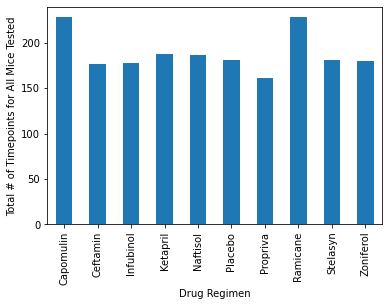

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

to_object = combined_df.astype({"Timepoint": str})
regimen_group = to_object.groupby("Drug Regimen").count()["Timepoint"]

bar_regimen = regimen_group.plot(kind="bar")

bar_regimen.set_xlabel("Drug Regimen")
bar_regimen.set_ylabel("Total # of Timepoints for All Mice Tested")

plt.show()
plt.tight_layout()

Text(0.5, 0, 'Drug Regimen')

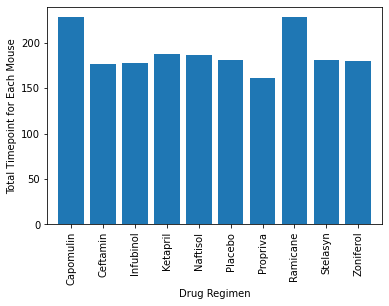

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pyplot_obj = combined_df.astype({"Timepoint": str})
obj = pyplot_obj.groupby("Drug Regimen").count()["Timepoint"]

plt.bar(obj.index, obj.values)

plt.xlim(-0.75, len(obj.index)-0.25)
plt.xticks(rotation="vertical")

plt.ylabel("Total Timepoint for Each Mouse")
plt.xlabel("Drug Regimen")

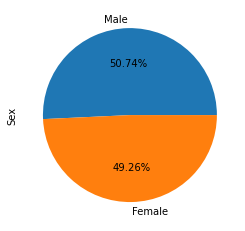

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group = combined_df["Sex"].value_counts()

mice_gender = gender_group.plot(kind="pie", autopct='%2.2f%%')

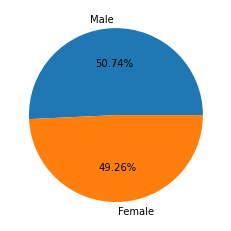

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = combined_df["Sex"].value_counts()

label = combined_df["Sex"].unique()

gender_pie = plt.pie(gender_group, labels = label, autopct='%2.2f%%')